In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn

In [214]:
dc=pd.read_csv("dataset.csv")

In [215]:
dc

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [216]:
dc.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [217]:
dc.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [218]:
dc.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [252]:
dc.drop(["id"],axis=1,inplace=True)

In [253]:
dc.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Here we can see that null values are present in bmi & smoking_status.So it should be removed.

In [254]:
dc.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,42.217894,0.093571,0.047512,0.643733,2.185438,0.501290,104.482750,28.584657,0.978548,0.018041
std,0.492151,22.519649,0.291235,0.212733,0.478901,1.093158,0.500004,43.111751,7.638803,0.568678,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,1.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,28.000000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [255]:
#As bmi is a numeric column so we can fill the null values of these column with mean & smoking_status is a categorical column so imputer technique will be applicable here.

dc["bmi"].fillna(28,inplace=True)



In [256]:
dc.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [257]:
from sklearn.impute import SimpleImputer

In [258]:
imp=SimpleImputer(strategy='most_frequent')
dc["smoking_status"]=imp.fit_transform(dc["smoking_status"].values.reshape(-1,1))

In [259]:
dc.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

So null values are removed.

In [260]:
for i in dc.columns:
    print(dc[i].value_counts())
    print("\n")

0    25665
1    17724
2       11
Name: gender, dtype: int64


51.00    738
52.00    721
53.00    701
78.00    698
50.00    694
        ... 
0.48      37
0.40      35
1.00      34
0.16      26
0.08      17
Name: age, Length: 104, dtype: int64


0    39339
1     4061
Name: hypertension, dtype: int64


0    41338
1     2062
Name: heart_disease, dtype: int64


1    27938
0    15462
Name: ever_married, dtype: int64


2    24834
3     6793
4     6156
0     5440
1      177
Name: work_type, dtype: int64


1    21756
0    21644
Name: Residence_type, dtype: int64


82.71     19
87.07     18
72.53     18
83.92     17
84.49     17
          ..
144.15     1
119.98     1
188.26     1
252.75     1
132.22     1
Name: avg_glucose_level, Length: 12543, dtype: int64


28.0    1696
27.7     271
27.6     267
26.8     266
26.1     265
        ... 
59.1       1
64.0       1
56.1       1
56.9       1
89.0       1
Name: bmi, Length: 555, dtype: int64


1    29345
0     7493
2     6562
Name: smoking_status, dty

Univariate analysis

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

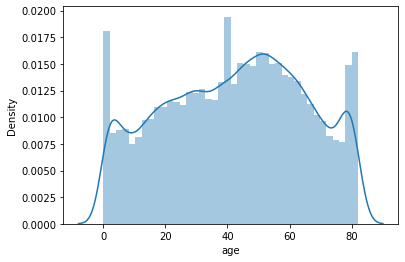

In [261]:
sns.distplot(dc["age"])

Here we can see that there is a possibility of skewnesss because data are not normally distributed.

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

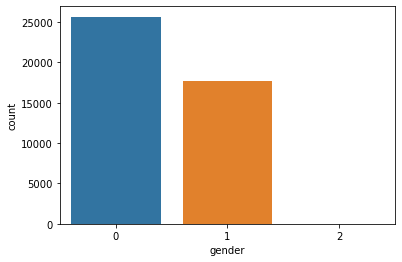

In [262]:
sns.countplot(dc["gender"])

Here we can see that female gender are more prone to stroke.

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

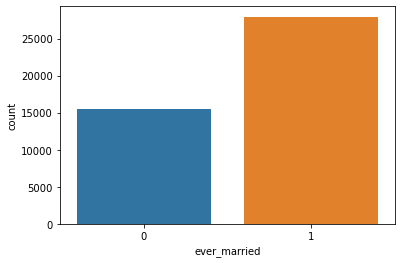

In [263]:
sns.countplot(dc["ever_married"])

Married person are more prone to stroke.

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

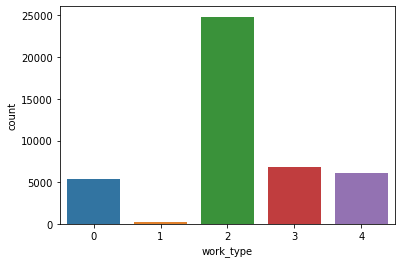

In [264]:
sns.countplot(dc["work_type"])

Most of those who have had a stroke are employed in private sector & self_employed. 

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

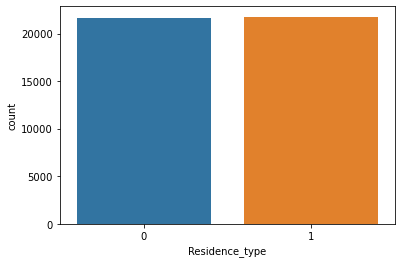

In [265]:
sns.countplot(dc["Residence_type"])

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

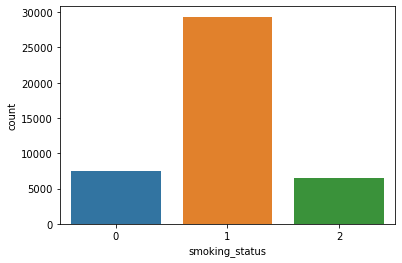

In [266]:
sns.countplot(dc["smoking_status"])

Most of those who have had a stroke are never smoked.

<AxesSubplot:ylabel='Frequency'>

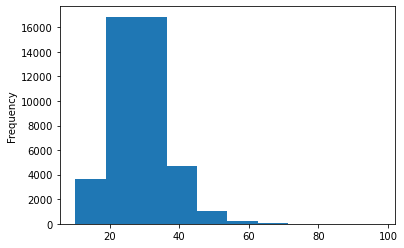

In [267]:
dc["bmi"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

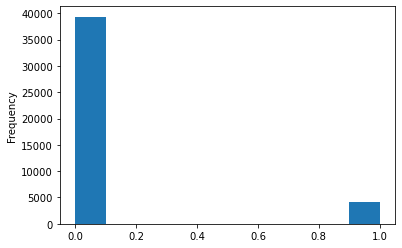

In [268]:
dc["hypertension"].plot.hist()

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

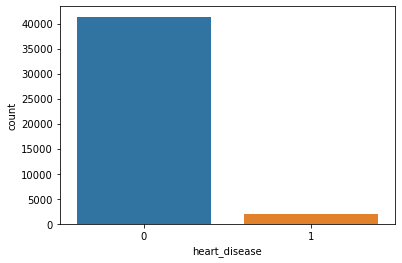

In [269]:
sns.countplot(dc["heart_disease"])

<AxesSubplot:ylabel='Frequency'>

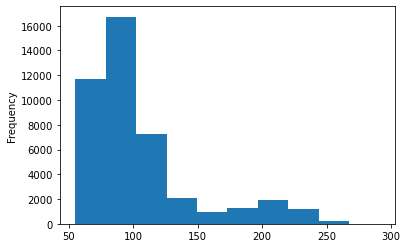

In [270]:
dc["avg_glucose_level"].plot.hist()

C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

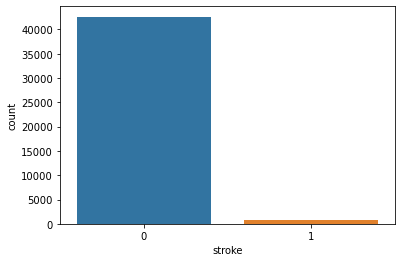

In [271]:
sns.countplot(dc["stroke"])

Bivariate Analysis

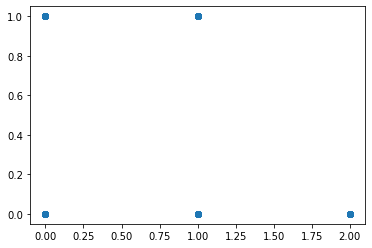

In [272]:
plt.scatter(dc["gender"],dc["stroke"])

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

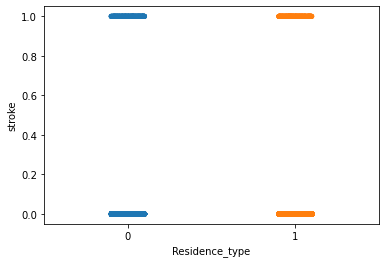

In [273]:
sns.stripplot(x="Residence_type",y="stroke",data=dc)

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

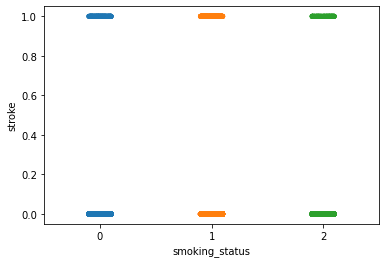

In [274]:
sns.stripplot(x="smoking_status",y="stroke",data=dc)

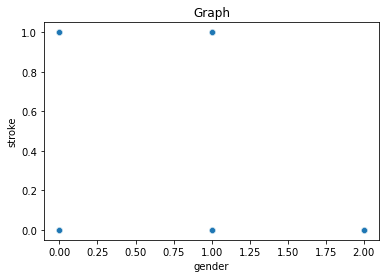

In [275]:
sns.scatterplot(y="stroke",x="gender",data=dc)
plt.title("Graph")
plt.show()

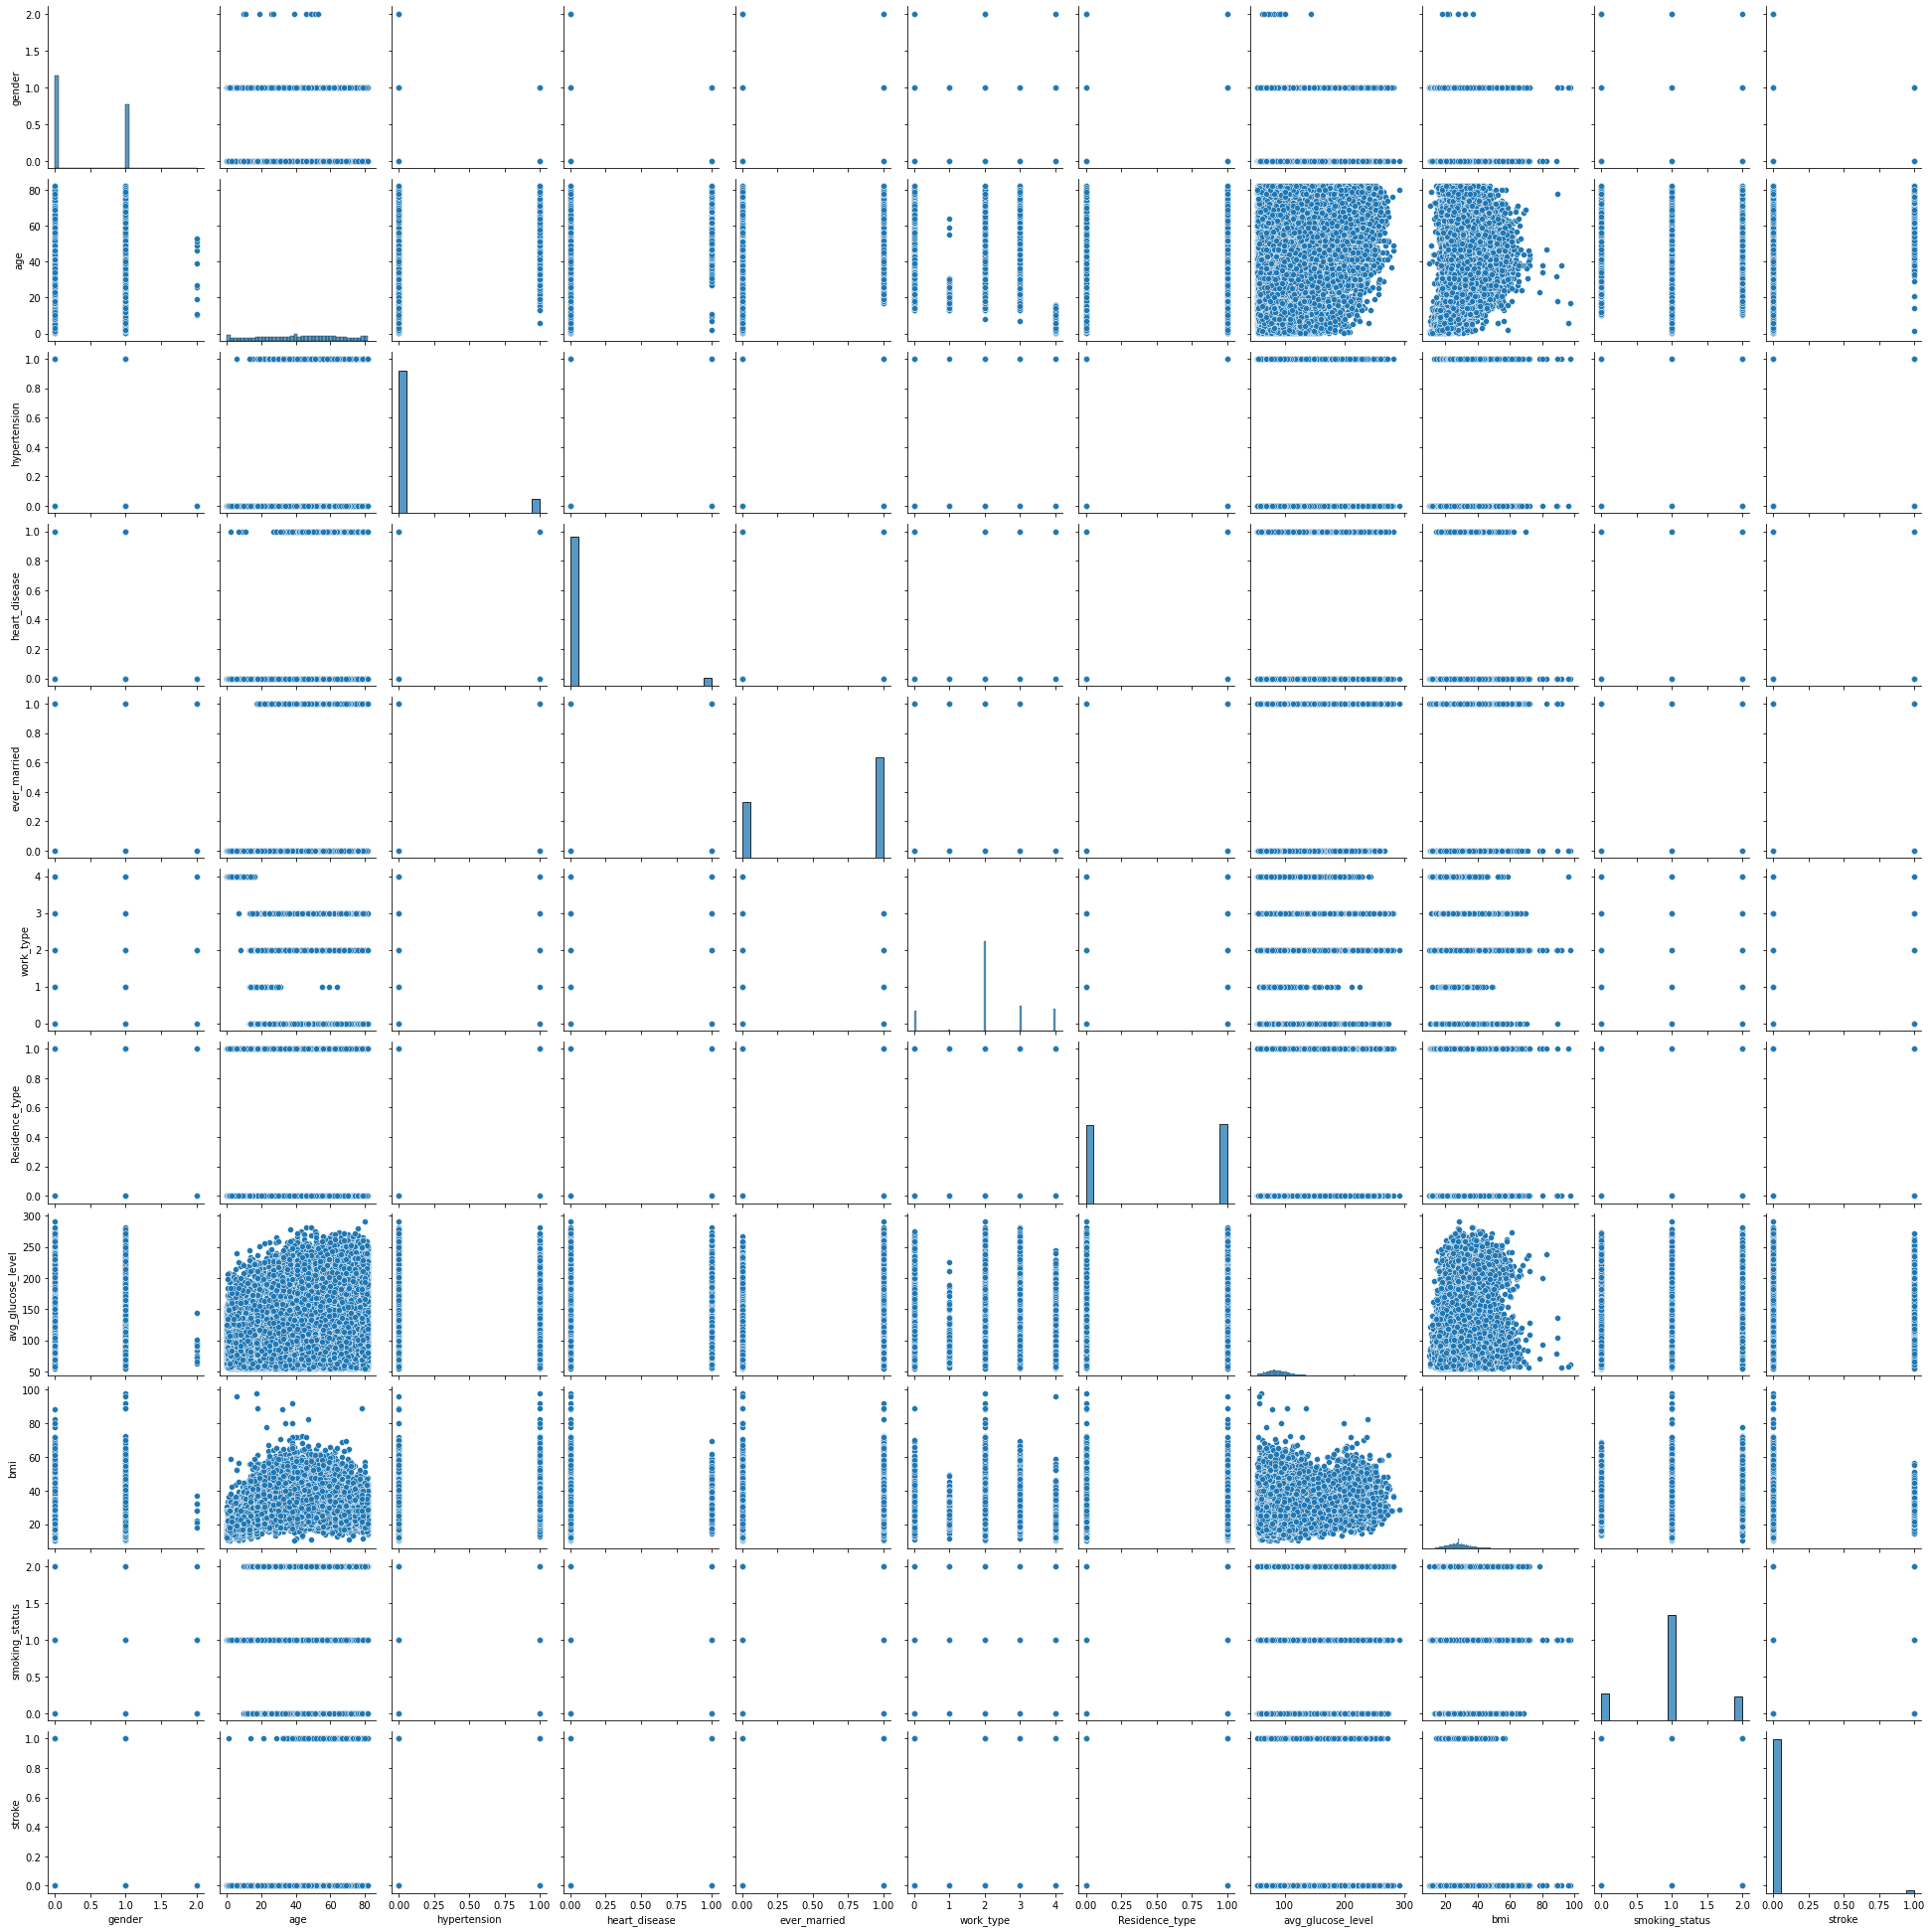

In [276]:
sns.pairplot(dc)

In [277]:
from sklearn.preprocessing import LabelEncoder

In [278]:
le=LabelEncoder()

In [279]:
dc["gender"]=le.fit_transform(dc["gender"])


In [280]:
dc["ever_married"]=le.fit_transform(dc["ever_married"])

In [281]:
dc["smoking_status"]=le.fit_transform(dc["smoking_status"])

In [282]:
dc["Residence_type"]=le.fit_transform(dc["Residence_type"])

In [283]:
dc["work_type"]=le.fit_transform(dc["work_type"])

In [284]:
dc.skew()

gender               0.377020
age                 -0.102497
hypertension         2.791199
heart_disease        4.254252
ever_married        -0.600288
work_type           -0.296065
Residence_type      -0.005161
avg_glucose_level    1.675405
bmi                  0.921966
smoking_status      -0.003427
stroke               7.242226
dtype: float64

As we know that skewness of categorical data no need to remove & it's range -0.5 to +0.5

In [285]:
dc["stroke"]=np.cbrt(dc["stroke"])

In [286]:
dc["bmi"]=np.cbrt(dc["bmi"])

In [294]:
dc["age"]=np.cbrt(dc["age"])

In [295]:
dc["avg_glucose_level"]=np.cbrt(dc["avg_glucose_level"])

In [287]:
dc["heart_disease"]=np.cbrt(dc["heart_disease"])

In [288]:
dc["hypertension"]=np.cbrt(dc["hypertension"])

In [297]:
dc.dtypes

gender                 int64
age                  float64
hypertension         float64
heart_disease        float64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke               float64
dtype: object

In [298]:
# checking the outliers


from scipy.stats import zscore

In [299]:
z=np.abs(zscore(dc))
z

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.201081,2.313745,0.321296,0.223342,1.344203,1.659945,1.002584,0.095149,1.556995,0.037722,0.135547
1,1.201081,0.692719,3.112398,0.223342,0.743935,0.169637,0.997423,0.314543,1.365340,0.037722,0.135547
2,0.830841,1.623290,0.321296,0.223342,1.344203,0.169637,0.997423,0.340480,1.630626,0.037722,0.135547
3,0.830841,1.002707,0.321296,0.223342,0.743935,0.169637,1.002584,0.981575,0.995910,1.720761,0.135547
4,1.201081,1.115564,0.321296,0.223342,1.344203,1.084428,1.002584,1.436024,1.359978,0.037722,0.135547
...,...,...,...,...,...,...,...,...,...,...,...
43395,0.830841,1.432111,0.321296,0.223342,1.344203,1.659945,0.997423,1.421211,1.136660,0.037722,0.135547
43396,0.830841,0.636994,0.321296,0.223342,0.743935,1.999219,0.997423,2.288309,2.928237,1.720761,0.135547
43397,0.830841,1.279007,3.112398,0.223342,0.743935,0.169637,0.997423,0.190711,0.129718,1.720761,0.135547
43398,1.201081,0.134507,0.321296,0.223342,0.743935,0.169637,0.997423,0.022242,0.676419,0.037722,0.135547


In [300]:
threshold=3
print(np.where(z>3))

(array([    1,     7,     9, ..., 43386, 43388, 43397], dtype=int64), array([2, 3, 2, ..., 3, 2, 2], dtype=int64))


In [301]:
# Now removing the outliers

dc_new=dc[(z<3).all(axis=1)]

In [302]:
dc_new

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.442250,0.0,0.0,0,4,0,1.658853,2.620741,1,0.0
2,0,2.000000,0.0,0.0,0,2,1,1.687370,2.601183,1,0.0
3,0,4.121285,0.0,0.0,1,2,0,1.600827,3.298867,0,0.0
4,1,2.410142,0.0,0.0,0,1,0,1.759085,2.673075,1,0.0
5,0,3.608826,0.0,0.0,1,2,1,1.812350,3.686486,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
43394,1,3.608826,0.0,0.0,0,0,1,1.599483,2.931794,0,0.0
43395,0,2.154435,0.0,0.0,0,4,1,1.572049,2.732394,1,0.0
43396,0,3.825862,0.0,0.0,1,0,1,1.814876,3.812149,0,0.0
43398,1,3.419952,0.0,0.0,1,2,1,1.666538,3.214001,1,0.0


So outliers are removed.

In [303]:
#checking the corelation

dccor=dc.corr()
dccor

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.047653,0.023709,0.082061,-0.031351,0.063739,0.001508,0.031471,-0.016871,-0.009824,0.011198
age,-0.047653,1.000000,0.241114,0.205592,0.711129,-0.486168,-0.000232,0.190611,0.481302,-0.080845,0.126612
hypertension,0.023709,0.241114,1.000000,0.119777,0.176575,-0.060800,-0.003124,0.145024,0.157019,-0.030731,0.075332
heart_disease,0.082061,0.205592,0.119777,1.000000,0.128833,-0.021835,-0.002743,0.133696,0.061037,-0.033478,0.113763
ever_married,-0.031351,0.711129,0.176575,0.128833,1.000000,-0.359848,0.004422,0.139528,0.370395,-0.048284,0.071920
work_type,0.063739,-0.486168,-0.060800,-0.021835,-0.359848,1.000000,-0.003473,-0.053011,-0.354983,-0.012727,-0.010800
Residence_type,0.001508,-0.000232,-0.003124,-0.002743,0.004422,-0.003473,1.000000,-0.000624,-0.003561,0.008323,0.002247
avg_glucose_level,0.031471,0.190611,0.145024,0.133696,0.139528,-0.053011,-0.000624,1.000000,0.166306,-0.029489,0.071317
bmi,-0.016871,0.481302,0.157019,0.061037,0.370395,-0.354983,-0.003561,0.166306,1.000000,-0.035769,0.022615
smoking_status,-0.009824,-0.080845,-0.030731,-0.033478,-0.048284,-0.012727,0.008323,-0.029489,-0.035769,1.000000,-0.021675


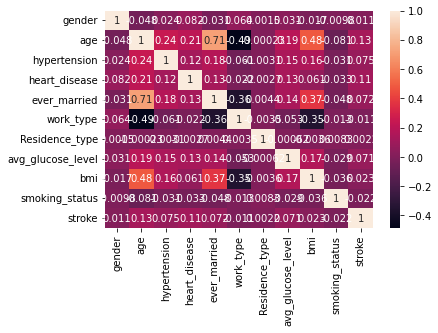

In [304]:
sns.heatmap(dccor,annot=True)
plt.show()

No multicolinearity present

In [367]:
from sklearn.preprocessing import StandardScaler

In [368]:
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-0.26846865,  1.20108119, -1.74151677, ..., -0.21717647,
        -1.60799511,  0.0377223 ],
       [-0.27800742,  1.20108119,  0.700823  , ..., -0.38325839,
         1.34624346,  0.0377223 ],
       [-0.93978947, -0.83084068, -1.51948588, ...,  0.14862128,
        -1.68955903,  0.0377223 ],
       ...,
       [-0.37733405, -0.83084068,  1.76657127, ..., -0.29093911,
         0.15864435, -1.72076086],
       [-0.39641159,  1.20108119, -0.0984882 , ..., -0.12346544,
         0.69404947,  0.0377223 ],
       [-0.00261687, -0.83084068,  1.76657127, ..., -0.57995877,
        -1.11400829,  0.0377223 ]])

In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [371]:
x_train.shape

(34720, 11)

In [372]:
y_train.shape

(34720,)

In [373]:
x_test.shape

(8680, 11)

In [374]:
y_test.shape

(8680,)

In [375]:
lg=LogisticRegression()

In [376]:
lg.fit(x_train,y_train)

LogisticRegression()

In [377]:
pred=lg.predict(x_test)

In [378]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [379]:
accuracy_score(y_test,pred)

0.9814516129032258

In [380]:
print(confusion_matrix(y_test,pred))

[[8519    0]
 [ 161    0]]


In [381]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see that this model giving  accuracy score is 98% & sensitivity is 100% & specificity is 0 & model performance is 99% .

In [382]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [383]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.00976411, 0.00083828, 0.00167003, ..., 0.00127166, 0.00590483,
       0.00468527])

In [384]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)

In [385]:
fpr

array([0.00000000e+00, 1.17384670e-04, 2.34769339e-04, 2.34769339e-04,
       7.04308017e-04, 7.04308017e-04, 9.39077356e-04, 9.39077356e-04,
       1.99553938e-03, 1.99553938e-03, 3.87369410e-03, 3.87369410e-03,
       4.22584810e-03, 4.22584810e-03, 4.81277145e-03, 4.81277145e-03,
       7.86477286e-03, 7.86477286e-03, 8.92123489e-03, 8.92123489e-03,
       9.74292757e-03, 9.74292757e-03, 1.20906210e-02, 1.20906210e-02,
       1.26775443e-02, 1.26775443e-02, 1.31470830e-02, 1.31470830e-02,
       1.39687757e-02, 1.39687757e-02, 1.65512384e-02, 1.65512384e-02,
       1.69033924e-02, 1.69033924e-02, 2.20683179e-02, 2.20683179e-02,
       2.41812419e-02, 2.41812419e-02, 2.52377040e-02, 2.52377040e-02,
       2.68810893e-02, 2.68810893e-02, 2.72332433e-02, 2.72332433e-02,
       2.74680127e-02, 2.74680127e-02, 2.79375514e-02, 2.79375514e-02,
       3.02852447e-02, 3.02852447e-02, 3.05200141e-02, 3.05200141e-02,
       3.21633995e-02, 3.21633995e-02, 3.52154009e-02, 3.52154009e-02,
      

In [386]:
tpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01242236, 0.01242236, 0.01863354, 0.01863354, 0.02484472,
       0.02484472, 0.0310559 , 0.0310559 , 0.03726708, 0.03726708,
       0.04347826, 0.04347826, 0.04968944, 0.04968944, 0.05590062,
       0.05590062, 0.0621118 , 0.0621118 , 0.06832298, 0.06832298,
       0.07453416, 0.07453416, 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.10559006, 0.10559006,
       0.11801242, 0.11801242, 0.1242236 , 0.1242236 , 0.13043478,
       0.13043478, 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.14906832, 0.14906832, 0.1552795 , 0.1552795 , 0.16149068,
       0.16149068, 0.17391304, 0.17391304, 0.18012422, 0.18012422,
       0.1863354 , 0.1863354 , 0.19254658, 0.19254658, 0.19875776,
       0.19875776, 0.20496894, 0.20496894, 0.21118012, 0.21118012,
       0.2173913 , 0.2173913 , 0.22360248, 0.22360248, 0.22981366,
       0.22981366, 0.23602484, 0.23602484, 0.24223602, 0.24223

In [387]:
thersholds

array([1.28137917e+00, 2.81379171e-01, 2.51561370e-01, 2.43783340e-01,
       2.17535236e-01, 2.17179718e-01, 2.07766334e-01, 2.07659995e-01,
       1.87683217e-01, 1.84732883e-01, 1.64590375e-01, 1.63975123e-01,
       1.61984021e-01, 1.61891675e-01, 1.56073608e-01, 1.55756402e-01,
       1.39609606e-01, 1.39484333e-01, 1.36557743e-01, 1.35688216e-01,
       1.33622571e-01, 1.33370520e-01, 1.25629212e-01, 1.25591588e-01,
       1.23085473e-01, 1.23081946e-01, 1.22634822e-01, 1.22138753e-01,
       1.20330812e-01, 1.19908154e-01, 1.14129023e-01, 1.13862919e-01,
       1.12988610e-01, 1.12755550e-01, 1.05540335e-01, 1.05044843e-01,
       1.02195277e-01, 1.02136263e-01, 1.00854544e-01, 1.00795673e-01,
       9.90918777e-02, 9.89654527e-02, 9.86590167e-02, 9.85903077e-02,
       9.84068537e-02, 9.82237672e-02, 9.78370539e-02, 9.78025536e-02,
       9.43114652e-02, 9.42777725e-02, 9.40639380e-02, 9.34937723e-02,
       9.25404763e-02, 9.25003233e-02, 8.85102645e-02, 8.84676724e-02,
      

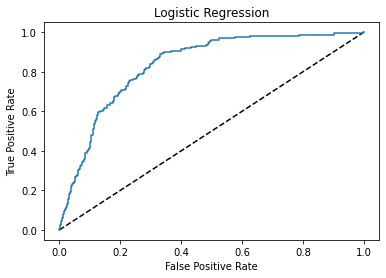

In [425]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()


In [427]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5

In [388]:
from sklearn.tree import DecisionTreeClassifier

In [389]:
dtc=DecisionTreeClassifier()

In [390]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [391]:
preddtc=dtc.predict(x_test)

In [392]:
accuracy_score(y_test,preddtc)

0.9623271889400922

In [393]:
print(confusion_matrix(y_test,preddtc))

[[8342  177]
 [ 150   11]]


In [394]:
print(classification_report(y_test,preddtc))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      8519
         1.0       0.06      0.07      0.06       161

    accuracy                           0.96      8680
   macro avg       0.52      0.52      0.52      8680
weighted avg       0.97      0.96      0.96      8680



Here accuracy of the model is 96% & sensitivity is 98% & specificy is 2% & model performance is 98%.

In [395]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [396]:
y_pred_prob=lg.predict_proba(x_test)[:,1]


In [397]:
y_pred_prob

array([0.00976411, 0.00083828, 0.00167003, ..., 0.00127166, 0.00590483,
       0.00468527])

In [398]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [399]:
fpr

array([0.00000000e+00, 1.17384670e-04, 2.34769339e-04, 2.34769339e-04,
       7.04308017e-04, 7.04308017e-04, 9.39077356e-04, 9.39077356e-04,
       1.99553938e-03, 1.99553938e-03, 3.87369410e-03, 3.87369410e-03,
       4.22584810e-03, 4.22584810e-03, 4.81277145e-03, 4.81277145e-03,
       7.86477286e-03, 7.86477286e-03, 8.92123489e-03, 8.92123489e-03,
       9.74292757e-03, 9.74292757e-03, 1.20906210e-02, 1.20906210e-02,
       1.26775443e-02, 1.26775443e-02, 1.31470830e-02, 1.31470830e-02,
       1.39687757e-02, 1.39687757e-02, 1.65512384e-02, 1.65512384e-02,
       1.69033924e-02, 1.69033924e-02, 2.20683179e-02, 2.20683179e-02,
       2.41812419e-02, 2.41812419e-02, 2.52377040e-02, 2.52377040e-02,
       2.68810893e-02, 2.68810893e-02, 2.72332433e-02, 2.72332433e-02,
       2.74680127e-02, 2.74680127e-02, 2.79375514e-02, 2.79375514e-02,
       3.02852447e-02, 3.02852447e-02, 3.05200141e-02, 3.05200141e-02,
       3.21633995e-02, 3.21633995e-02, 3.52154009e-02, 3.52154009e-02,
      

In [400]:
tpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01242236, 0.01242236, 0.01863354, 0.01863354, 0.02484472,
       0.02484472, 0.0310559 , 0.0310559 , 0.03726708, 0.03726708,
       0.04347826, 0.04347826, 0.04968944, 0.04968944, 0.05590062,
       0.05590062, 0.0621118 , 0.0621118 , 0.06832298, 0.06832298,
       0.07453416, 0.07453416, 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.10559006, 0.10559006,
       0.11801242, 0.11801242, 0.1242236 , 0.1242236 , 0.13043478,
       0.13043478, 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.14906832, 0.14906832, 0.1552795 , 0.1552795 , 0.16149068,
       0.16149068, 0.17391304, 0.17391304, 0.18012422, 0.18012422,
       0.1863354 , 0.1863354 , 0.19254658, 0.19254658, 0.19875776,
       0.19875776, 0.20496894, 0.20496894, 0.21118012, 0.21118012,
       0.2173913 , 0.2173913 , 0.22360248, 0.22360248, 0.22981366,
       0.22981366, 0.23602484, 0.23602484, 0.24223602, 0.24223

In [401]:
thresholds

array([1.28137917e+00, 2.81379171e-01, 2.51561370e-01, 2.43783340e-01,
       2.17535236e-01, 2.17179718e-01, 2.07766334e-01, 2.07659995e-01,
       1.87683217e-01, 1.84732883e-01, 1.64590375e-01, 1.63975123e-01,
       1.61984021e-01, 1.61891675e-01, 1.56073608e-01, 1.55756402e-01,
       1.39609606e-01, 1.39484333e-01, 1.36557743e-01, 1.35688216e-01,
       1.33622571e-01, 1.33370520e-01, 1.25629212e-01, 1.25591588e-01,
       1.23085473e-01, 1.23081946e-01, 1.22634822e-01, 1.22138753e-01,
       1.20330812e-01, 1.19908154e-01, 1.14129023e-01, 1.13862919e-01,
       1.12988610e-01, 1.12755550e-01, 1.05540335e-01, 1.05044843e-01,
       1.02195277e-01, 1.02136263e-01, 1.00854544e-01, 1.00795673e-01,
       9.90918777e-02, 9.89654527e-02, 9.86590167e-02, 9.85903077e-02,
       9.84068537e-02, 9.82237672e-02, 9.78370539e-02, 9.78025536e-02,
       9.43114652e-02, 9.42777725e-02, 9.40639380e-02, 9.34937723e-02,
       9.25404763e-02, 9.25003233e-02, 8.85102645e-02, 8.84676724e-02,
      

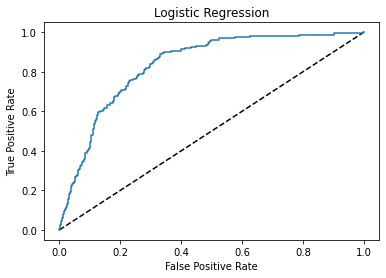

In [424]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()


In [426]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5

In [402]:
from sklearn.ensemble import RandomForestClassifier

In [403]:
rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [404]:
predrf=rf.predict(x_test)

In [405]:
print(accuracy_score(y_test,predrf))

0.9814516129032258


In [406]:
print(confusion_matrix(y_test,predrf))

[[8519    0]
 [ 161    0]]


In [407]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see that model accuracy is 98% & sensitivity is 100% & specificity is 0 & model performance is 99%

In [428]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [429]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.00976411, 0.00083828, 0.00167003, ..., 0.00127166, 0.00590483,
       0.00468527])

In [430]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.00000000e+00, 1.17384670e-04, 2.34769339e-04, 2.34769339e-04,
       7.04308017e-04, 7.04308017e-04, 9.39077356e-04, 9.39077356e-04,
       1.99553938e-03, 1.99553938e-03, 3.87369410e-03, 3.87369410e-03,
       4.22584810e-03, 4.22584810e-03, 4.81277145e-03, 4.81277145e-03,
       7.86477286e-03, 7.86477286e-03, 8.92123489e-03, 8.92123489e-03,
       9.74292757e-03, 9.74292757e-03, 1.20906210e-02, 1.20906210e-02,
       1.26775443e-02, 1.26775443e-02, 1.31470830e-02, 1.31470830e-02,
       1.39687757e-02, 1.39687757e-02, 1.65512384e-02, 1.65512384e-02,
       1.69033924e-02, 1.69033924e-02, 2.20683179e-02, 2.20683179e-02,
       2.41812419e-02, 2.41812419e-02, 2.52377040e-02, 2.52377040e-02,
       2.68810893e-02, 2.68810893e-02, 2.72332433e-02, 2.72332433e-02,
       2.74680127e-02, 2.74680127e-02, 2.79375514e-02, 2.79375514e-02,
       3.02852447e-02, 3.02852447e-02, 3.05200141e-02, 3.05200141e-02,
       3.21633995e-02, 3.21633995e-02, 3.52154009e-02, 3.52154009e-02,
      

In [431]:
tpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01242236, 0.01242236, 0.01863354, 0.01863354, 0.02484472,
       0.02484472, 0.0310559 , 0.0310559 , 0.03726708, 0.03726708,
       0.04347826, 0.04347826, 0.04968944, 0.04968944, 0.05590062,
       0.05590062, 0.0621118 , 0.0621118 , 0.06832298, 0.06832298,
       0.07453416, 0.07453416, 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.10559006, 0.10559006,
       0.11801242, 0.11801242, 0.1242236 , 0.1242236 , 0.13043478,
       0.13043478, 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.14906832, 0.14906832, 0.1552795 , 0.1552795 , 0.16149068,
       0.16149068, 0.17391304, 0.17391304, 0.18012422, 0.18012422,
       0.1863354 , 0.1863354 , 0.19254658, 0.19254658, 0.19875776,
       0.19875776, 0.20496894, 0.20496894, 0.21118012, 0.21118012,
       0.2173913 , 0.2173913 , 0.22360248, 0.22360248, 0.22981366,
       0.22981366, 0.23602484, 0.23602484, 0.24223602, 0.24223

In [432]:
thresholds

array([1.28137917e+00, 2.81379171e-01, 2.51561370e-01, 2.43783340e-01,
       2.17535236e-01, 2.17179718e-01, 2.07766334e-01, 2.07659995e-01,
       1.87683217e-01, 1.84732883e-01, 1.64590375e-01, 1.63975123e-01,
       1.61984021e-01, 1.61891675e-01, 1.56073608e-01, 1.55756402e-01,
       1.39609606e-01, 1.39484333e-01, 1.36557743e-01, 1.35688216e-01,
       1.33622571e-01, 1.33370520e-01, 1.25629212e-01, 1.25591588e-01,
       1.23085473e-01, 1.23081946e-01, 1.22634822e-01, 1.22138753e-01,
       1.20330812e-01, 1.19908154e-01, 1.14129023e-01, 1.13862919e-01,
       1.12988610e-01, 1.12755550e-01, 1.05540335e-01, 1.05044843e-01,
       1.02195277e-01, 1.02136263e-01, 1.00854544e-01, 1.00795673e-01,
       9.90918777e-02, 9.89654527e-02, 9.86590167e-02, 9.85903077e-02,
       9.84068537e-02, 9.82237672e-02, 9.78370539e-02, 9.78025536e-02,
       9.43114652e-02, 9.42777725e-02, 9.40639380e-02, 9.34937723e-02,
       9.25404763e-02, 9.25003233e-02, 8.85102645e-02, 8.84676724e-02,
      

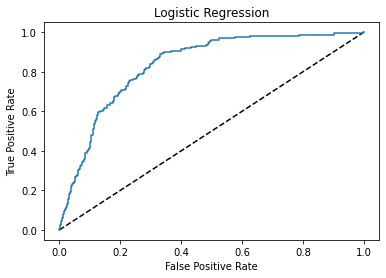

In [433]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()


In [434]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5

In [408]:
from sklearn.neighbors import KNeighborsClassifier

In [409]:
Knn=KNeighborsClassifier()

In [410]:
Knn.fit(x_train,y_train)

KNeighborsClassifier()

In [411]:
predKnn=Knn.predict(x_test)

In [412]:
predKnn

array([0., 0., 0., ..., 0., 0., 0.])

In [413]:
accuracy_score(y_test,predKnn)

0.9807603686635945

In [414]:
print(confusion_matrix(y_test,predrf))

[[8519    0]
 [ 161    0]]


In [415]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see that this model accuracy is 98% & sensitivity is 100% & specificity is 0 & model performance is 99%.

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

In [435]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.00000000e+00, 1.17384670e-04, 2.34769339e-04, 2.34769339e-04,
       7.04308017e-04, 7.04308017e-04, 9.39077356e-04, 9.39077356e-04,
       1.99553938e-03, 1.99553938e-03, 3.87369410e-03, 3.87369410e-03,
       4.22584810e-03, 4.22584810e-03, 4.81277145e-03, 4.81277145e-03,
       7.86477286e-03, 7.86477286e-03, 8.92123489e-03, 8.92123489e-03,
       9.74292757e-03, 9.74292757e-03, 1.20906210e-02, 1.20906210e-02,
       1.26775443e-02, 1.26775443e-02, 1.31470830e-02, 1.31470830e-02,
       1.39687757e-02, 1.39687757e-02, 1.65512384e-02, 1.65512384e-02,
       1.69033924e-02, 1.69033924e-02, 2.20683179e-02, 2.20683179e-02,
       2.41812419e-02, 2.41812419e-02, 2.52377040e-02, 2.52377040e-02,
       2.68810893e-02, 2.68810893e-02, 2.72332433e-02, 2.72332433e-02,
       2.74680127e-02, 2.74680127e-02, 2.79375514e-02, 2.79375514e-02,
       3.02852447e-02, 3.02852447e-02, 3.05200141e-02, 3.05200141e-02,
       3.21633995e-02, 3.21633995e-02, 3.52154009e-02, 3.52154009e-02,
      

In [436]:
tpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01242236, 0.01242236, 0.01863354, 0.01863354, 0.02484472,
       0.02484472, 0.0310559 , 0.0310559 , 0.03726708, 0.03726708,
       0.04347826, 0.04347826, 0.04968944, 0.04968944, 0.05590062,
       0.05590062, 0.0621118 , 0.0621118 , 0.06832298, 0.06832298,
       0.07453416, 0.07453416, 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.10559006, 0.10559006,
       0.11801242, 0.11801242, 0.1242236 , 0.1242236 , 0.13043478,
       0.13043478, 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.14906832, 0.14906832, 0.1552795 , 0.1552795 , 0.16149068,
       0.16149068, 0.17391304, 0.17391304, 0.18012422, 0.18012422,
       0.1863354 , 0.1863354 , 0.19254658, 0.19254658, 0.19875776,
       0.19875776, 0.20496894, 0.20496894, 0.21118012, 0.21118012,
       0.2173913 , 0.2173913 , 0.22360248, 0.22360248, 0.22981366,
       0.22981366, 0.23602484, 0.23602484, 0.24223602, 0.24223

In [437]:
thresholds

array([1.28137917e+00, 2.81379171e-01, 2.51561370e-01, 2.43783340e-01,
       2.17535236e-01, 2.17179718e-01, 2.07766334e-01, 2.07659995e-01,
       1.87683217e-01, 1.84732883e-01, 1.64590375e-01, 1.63975123e-01,
       1.61984021e-01, 1.61891675e-01, 1.56073608e-01, 1.55756402e-01,
       1.39609606e-01, 1.39484333e-01, 1.36557743e-01, 1.35688216e-01,
       1.33622571e-01, 1.33370520e-01, 1.25629212e-01, 1.25591588e-01,
       1.23085473e-01, 1.23081946e-01, 1.22634822e-01, 1.22138753e-01,
       1.20330812e-01, 1.19908154e-01, 1.14129023e-01, 1.13862919e-01,
       1.12988610e-01, 1.12755550e-01, 1.05540335e-01, 1.05044843e-01,
       1.02195277e-01, 1.02136263e-01, 1.00854544e-01, 1.00795673e-01,
       9.90918777e-02, 9.89654527e-02, 9.86590167e-02, 9.85903077e-02,
       9.84068537e-02, 9.82237672e-02, 9.78370539e-02, 9.78025536e-02,
       9.43114652e-02, 9.42777725e-02, 9.40639380e-02, 9.34937723e-02,
       9.25404763e-02, 9.25003233e-02, 8.85102645e-02, 8.84676724e-02,
      

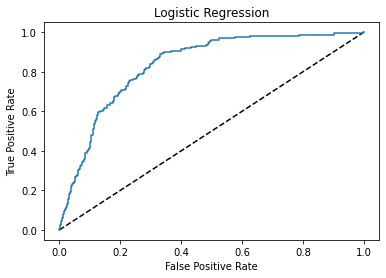

In [438]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()


In [439]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5

In [416]:
from sklearn.svm import SVC

In [417]:
sv=SVC(kernel="rbf")

In [418]:
sv.fit(x_train,y_train)

SVC()

In [419]:
predSVC=sv.predict(x_test)

In [420]:
predSVC

array([0., 0., 0., ..., 0., 0., 0.])

In [421]:
accuracy_score(y_test,predSVC)

0.9814516129032258

In [422]:
print(confusion_matrix(y_test,predSVC))

[[8519    0]
 [ 161    0]]


In [423]:
print(classification_report(y_test,predSVC))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      8519
         1.0       0.00      0.00      0.00       161

    accuracy                           0.98      8680
   macro avg       0.49      0.50      0.50      8680
weighted avg       0.96      0.98      0.97      8680



C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rikug\anaconda3\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Here we can see that accuracy of the model is 98% & sensitivity is 100% & specificity is 0 & model performance is 99%.

In [440]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [441]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.00976411, 0.00083828, 0.00167003, ..., 0.00127166, 0.00590483,
       0.00468527])

In [442]:
fpr,tpr,thersholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.00000000e+00, 1.17384670e-04, 2.34769339e-04, 2.34769339e-04,
       7.04308017e-04, 7.04308017e-04, 9.39077356e-04, 9.39077356e-04,
       1.99553938e-03, 1.99553938e-03, 3.87369410e-03, 3.87369410e-03,
       4.22584810e-03, 4.22584810e-03, 4.81277145e-03, 4.81277145e-03,
       7.86477286e-03, 7.86477286e-03, 8.92123489e-03, 8.92123489e-03,
       9.74292757e-03, 9.74292757e-03, 1.20906210e-02, 1.20906210e-02,
       1.26775443e-02, 1.26775443e-02, 1.31470830e-02, 1.31470830e-02,
       1.39687757e-02, 1.39687757e-02, 1.65512384e-02, 1.65512384e-02,
       1.69033924e-02, 1.69033924e-02, 2.20683179e-02, 2.20683179e-02,
       2.41812419e-02, 2.41812419e-02, 2.52377040e-02, 2.52377040e-02,
       2.68810893e-02, 2.68810893e-02, 2.72332433e-02, 2.72332433e-02,
       2.74680127e-02, 2.74680127e-02, 2.79375514e-02, 2.79375514e-02,
       3.02852447e-02, 3.02852447e-02, 3.05200141e-02, 3.05200141e-02,
       3.21633995e-02, 3.21633995e-02, 3.52154009e-02, 3.52154009e-02,
      

In [443]:
tpr

array([0.        , 0.        , 0.        , 0.00621118, 0.00621118,
       0.01242236, 0.01242236, 0.01863354, 0.01863354, 0.02484472,
       0.02484472, 0.0310559 , 0.0310559 , 0.03726708, 0.03726708,
       0.04347826, 0.04347826, 0.04968944, 0.04968944, 0.05590062,
       0.05590062, 0.0621118 , 0.0621118 , 0.06832298, 0.06832298,
       0.07453416, 0.07453416, 0.08074534, 0.08074534, 0.08695652,
       0.08695652, 0.0931677 , 0.0931677 , 0.10559006, 0.10559006,
       0.11801242, 0.11801242, 0.1242236 , 0.1242236 , 0.13043478,
       0.13043478, 0.13664596, 0.13664596, 0.14285714, 0.14285714,
       0.14906832, 0.14906832, 0.1552795 , 0.1552795 , 0.16149068,
       0.16149068, 0.17391304, 0.17391304, 0.18012422, 0.18012422,
       0.1863354 , 0.1863354 , 0.19254658, 0.19254658, 0.19875776,
       0.19875776, 0.20496894, 0.20496894, 0.21118012, 0.21118012,
       0.2173913 , 0.2173913 , 0.22360248, 0.22360248, 0.22981366,
       0.22981366, 0.23602484, 0.23602484, 0.24223602, 0.24223

In [444]:
thresholds

array([1.28137917e+00, 2.81379171e-01, 2.51561370e-01, 2.43783340e-01,
       2.17535236e-01, 2.17179718e-01, 2.07766334e-01, 2.07659995e-01,
       1.87683217e-01, 1.84732883e-01, 1.64590375e-01, 1.63975123e-01,
       1.61984021e-01, 1.61891675e-01, 1.56073608e-01, 1.55756402e-01,
       1.39609606e-01, 1.39484333e-01, 1.36557743e-01, 1.35688216e-01,
       1.33622571e-01, 1.33370520e-01, 1.25629212e-01, 1.25591588e-01,
       1.23085473e-01, 1.23081946e-01, 1.22634822e-01, 1.22138753e-01,
       1.20330812e-01, 1.19908154e-01, 1.14129023e-01, 1.13862919e-01,
       1.12988610e-01, 1.12755550e-01, 1.05540335e-01, 1.05044843e-01,
       1.02195277e-01, 1.02136263e-01, 1.00854544e-01, 1.00795673e-01,
       9.90918777e-02, 9.89654527e-02, 9.86590167e-02, 9.85903077e-02,
       9.84068537e-02, 9.82237672e-02, 9.78370539e-02, 9.78025536e-02,
       9.43114652e-02, 9.42777725e-02, 9.40639380e-02, 9.34937723e-02,
       9.25404763e-02, 9.25003233e-02, 8.85102645e-02, 8.84676724e-02,
      

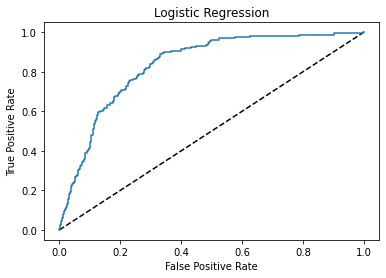

In [445]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()


In [446]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
auc_score

0.5

so SVC,Randomforestclassifier & KNN & logisticRegression have same accuracy . So these models are best to predict stroke.